In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

X = np.array([0, 1, 2, 3])
y = np.array([99, 86, 87, 88])
plt.scatter (x, y, color = 'r')
plt.show()

NameError: name 'np' is not defined

Found 13165 files belonging to 2 classes.
Using 10532 files for training.
Found 13165 files belonging to 2 classes.
Using 2633 files for validation.
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_22 (Flatten)        (None, 4096)              0         
                                                                 
 dense_73 (Dense)            (None, 32)                131104    
                                                                 
 dense_74 (Dense)            (None, 2)                 66        
                                                                 
Total params: 131170 (512.38 KB)
Trainable params: 131170 (512.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
330/330 [==============================] - 313s 137ms/step - loss: 0.4625 - accuracy: 0.7857 - val_loss: 0.3561 - val

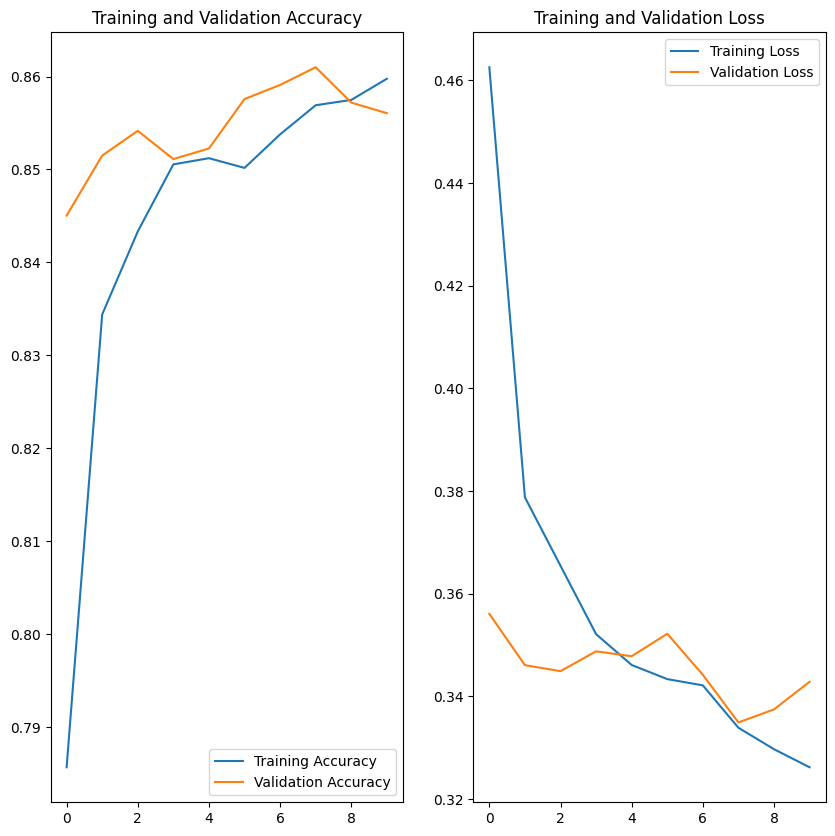

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

data_dir = "/content/drive/MyDrive/SMILEs"

# Veri yükleme
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(64, 64),
    batch_size=32,
    color_mode='grayscale'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(64, 64),
    batch_size=32,
    color_mode='grayscale'
)

# Veri ön işleme
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Model tanımı
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64)),
    tf.keras.layers.Dense(32, activation='relu'),  # Tek gizli katman ve 32 nöron kullanıldı
    tf.keras.layers.Dense(2)
])

# Model derleme
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Model eğitimi
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


# Eğitim sonuçlarını çizme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Bu örnekte, 128, 100 ve 72 nöronlu ara katmanlar ekledim.

Found 13165 files belonging to 2 classes.
Using 10532 files for training.
Found 13165 files belonging to 2 classes.
Using 2633 files for validation.
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 4096)              0         
                                                                 
 dense_54 (Dense)            (None, 128)               524416    
                                                                 
 dense_55 (Dense)            (None, 100)               12900     
                                                                 
 dense_56 (Dense)            (None, 72)                7272      
                                                                 
 dense_57 (Dense)            (None, 2)                 146       
                                                                 
Total params: 544734 (2.08 MB)
Train

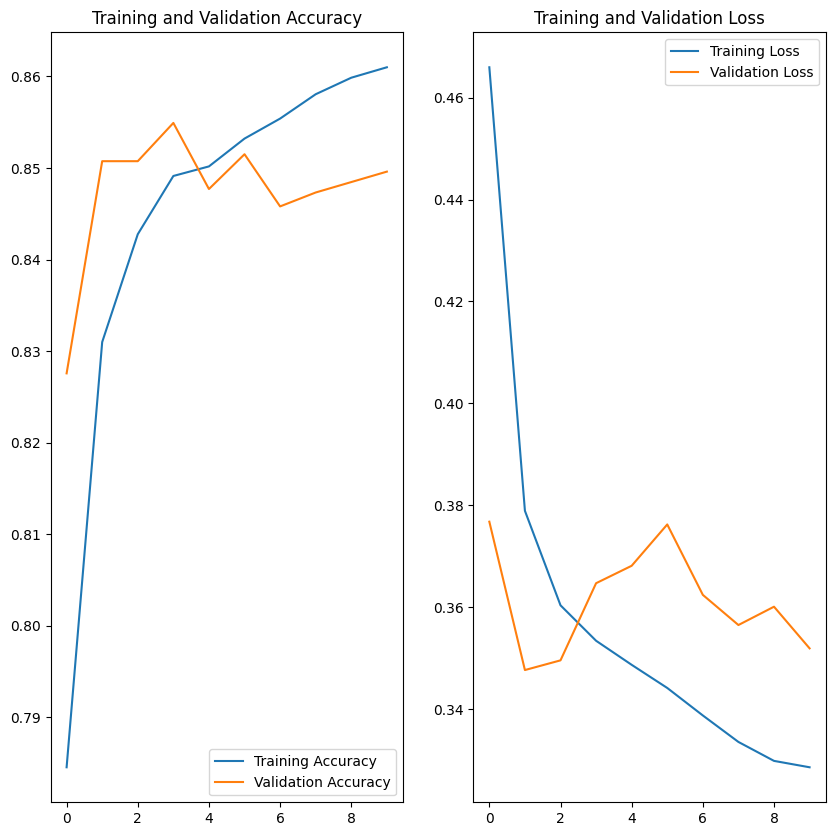

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

data_dir = "/content/drive/MyDrive/SMILEs"

# Veri yükleme
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(64, 64),
  batch_size=32,
  color_mode='grayscale'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(64, 64),
  batch_size=32,
  color_mode='grayscale'
)

# Veri ön işleme
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Model tanımı
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(72, activation='relu'),
    tf.keras.layers.Dense(2)
])

# Model derleme
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Model eğitimi
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Eğitim sonuçlarını çizme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

learning rate

Found 13165 files belonging to 2 classes.
Using 10532 files for training.
Found 13165 files belonging to 2 classes.
Using 2633 files for validation.
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 4096)              0         
                                                                 
 dense_75 (Dense)            (None, 128)               524416    
                                                                 
 dense_76 (Dense)            (None, 100)               12900     
                                                                 
 dense_77 (Dense)            (None, 72)                7272      
                                                                 
 dense_78 (Dense)            (None, 2)                 146       
                                                                 
Total params: 544734 (2.08 MB)
Train

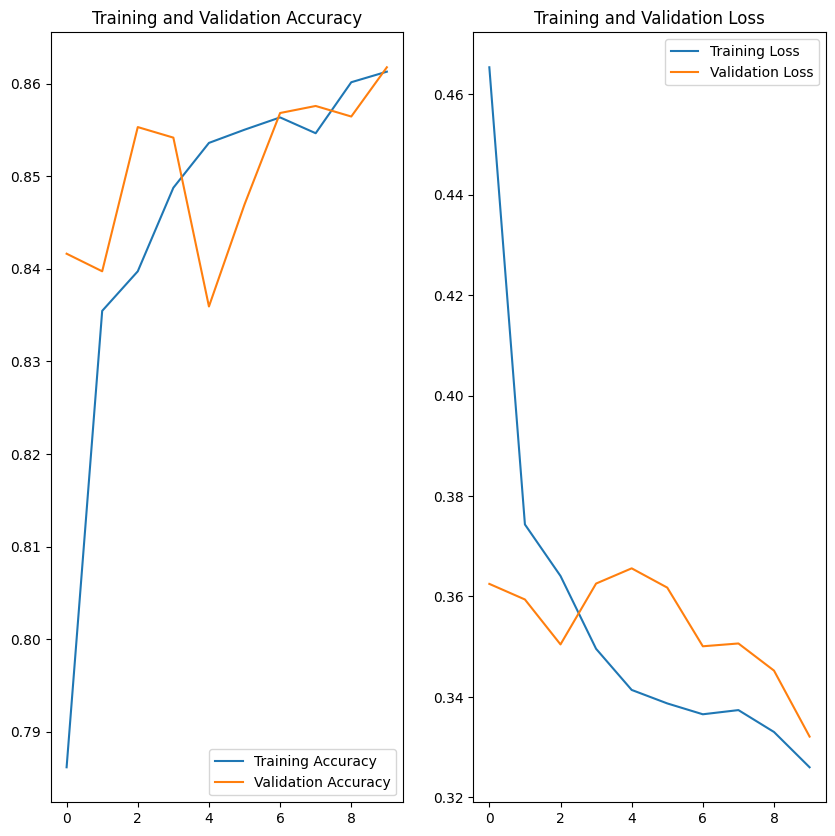

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

data_dir = "/content/drive/MyDrive/SMILEs"

# Veri yükleme
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(64, 64),
  batch_size=32,
  color_mode='grayscale'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(64, 64),
  batch_size=32,
  color_mode='grayscale'
)

# Veri ön işleme
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Model tanımı
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(72, activation='relu'),
    tf.keras.layers.Dense(2)
])

learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Model eğitimi
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Eğitim sonuçlarını çizme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

aşırı öğrenmeyi engellemek için dropout kullandım.

Found 13165 files belonging to 2 classes.
Using 10532 files for training.
Found 13165 files belonging to 2 classes.
Using 2633 files for validation.
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 4096)              0         
                                                                 
 dense_44 (Dense)            (None, 128)               524416    
                                                                 
 dense_45 (Dense)            (None, 100)               12900     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_46 (Dense)            (None, 72)                7272      
                                                                 
 dense_47 (Dense)            (None, 

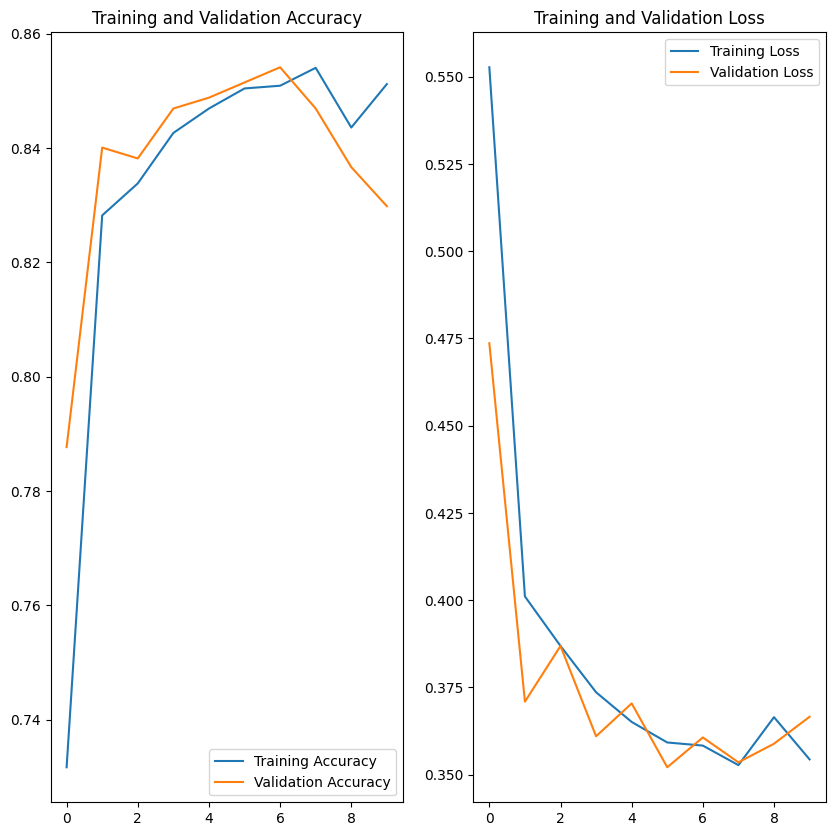

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

data_dir = "/content/drive/MyDrive/SMILEs"

# Veri yükleme
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(64, 64),
  batch_size=32,
  color_mode='grayscale'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(64, 64),
  batch_size=32,
  color_mode='grayscale'
)

# Veri ön işleme
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Model tanımı (Dropout eklenmiş)
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(64, 64, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(72, activation='relu'),
    layers.Dense(2)
])

# Model derleme
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Model eğitimi
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Eğitim sonuçlarını çizme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


erken durdurma(early stopping)

Found 13165 files belonging to 2 classes.
Using 10532 files for training.
Found 13165 files belonging to 2 classes.
Using 2633 files for validation.
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 4096)              0         
                                                                 
 dense_58 (Dense)            (None, 128)               524416    
                                                                 
 dense_59 (Dense)            (None, 100)               12900     
                                                                 
 dense_60 (Dense)            (None, 72)                7272      
                                                                 
 dense_61 (Dense)            (None, 2)                 146       
                                                                 
Total params: 544734 (2.08 MB)
Train

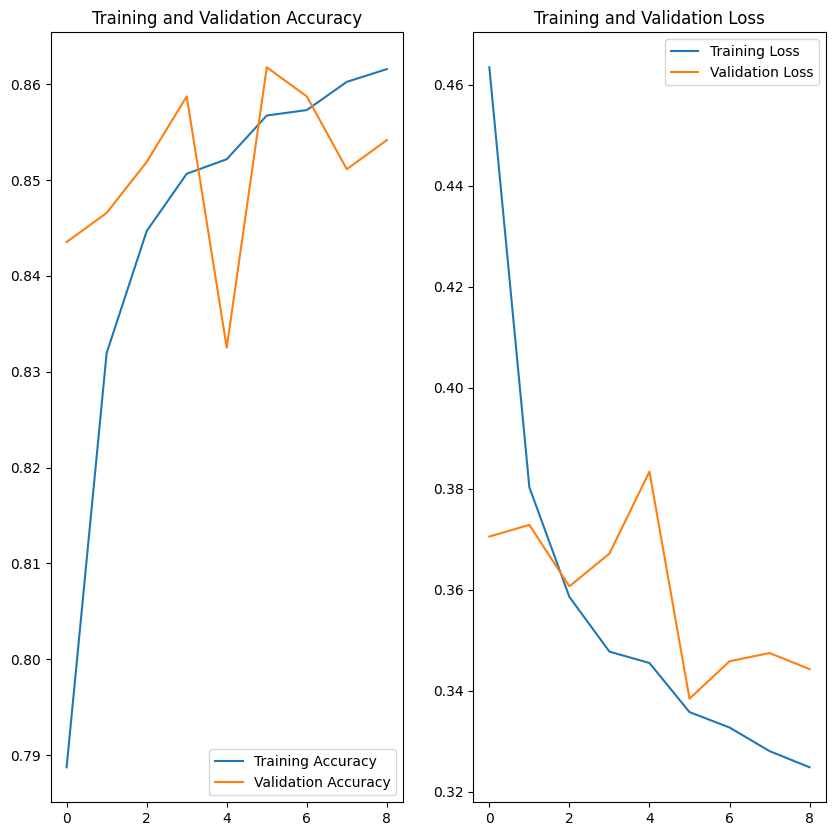

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

data_dir = "/content/drive/MyDrive/SMILEs"

# Veri yükleme
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(64, 64),
  batch_size=32,
  color_mode='grayscale'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(64, 64),
  batch_size=32,
  color_mode='grayscale'
)

# Veri ön işleme
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Model tanımı
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(72, activation='relu'),
    tf.keras.layers.Dense(2)
])

# Model derleme
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

# Model eğitimi
epochs = 30  # 10 dan büyük sayı kullandım zaten early stopping gerektiğinde duracak.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping]
)

# Eğitim sonuçlarını çizme
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 13165 files belonging to 2 classes.
Using 10532 files for training.
Found 13165 files belonging to 2 classes.
Using 2633 files for validation.
['negatives', 'positives']
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 100)       115300    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 100)       0         
 g2D)       

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


330/330 [==============================] - 540s 2s/step - loss: 0.5962 - accuracy: 0.7210 - val_loss: 0.5992 - val_accuracy: 0.7144
Epoch 2/10
330/330 [==============================] - 297s 900ms/step - loss: 0.5933 - accuracy: 0.7210 - val_loss: 0.5986 - val_accuracy: 0.7144
Epoch 3/10
330/330 [==============================] - 294s 893ms/step - loss: 0.5926 - accuracy: 0.7210 - val_loss: 0.5980 - val_accuracy: 0.7144
Epoch 4/10
330/330 [==============================] - 294s 890ms/step - loss: 0.5922 - accuracy: 0.7210 - val_loss: 0.5976 - val_accuracy: 0.7144
Epoch 5/10
330/330 [==============================] - 295s 895ms/step - loss: 0.5611 - accuracy: 0.7266 - val_loss: 0.4539 - val_accuracy: 0.7755
Epoch 6/10
330/330 [==============================] - 288s 872ms/step - loss: 0.4089 - accuracy: 0.8130 - val_loss: 0.3697 - val_accuracy: 0.8439
Epoch 7/10
330/330 [==============================] - 307s 930ms/step - loss: 0.3553 - accuracy: 0.8450 - val_loss: 0.3410 - val_accuracy:

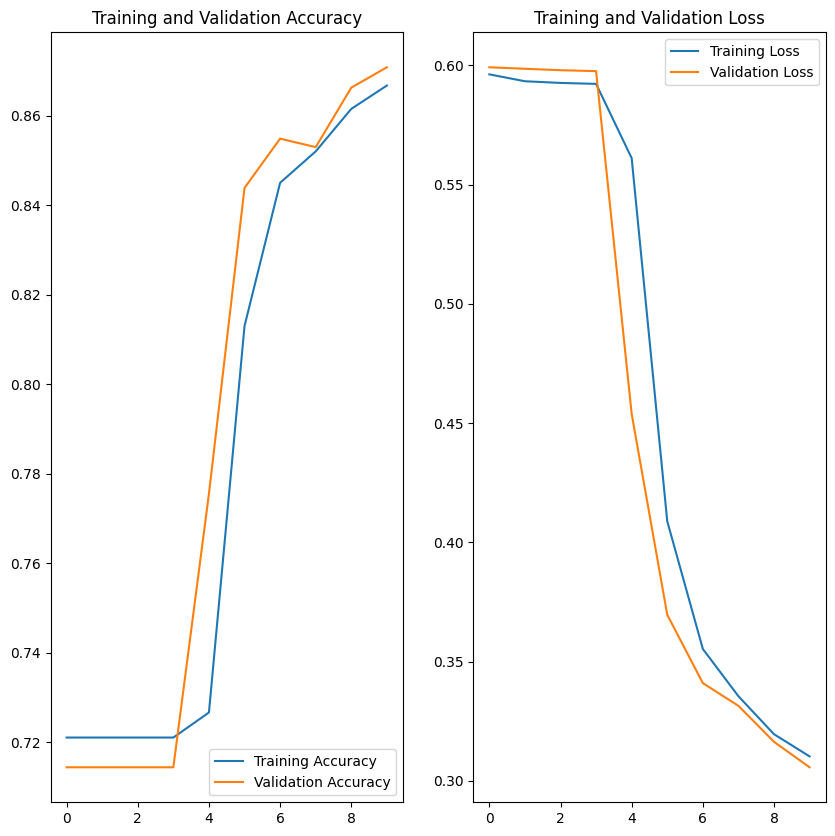

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

# Veri Yolu
data_dir = pathlib.Path("/content/drive/MyDrive/SMILEs")

# Ayarlar
batch_size = 32
image_height = 64
image_width = 64

# Eğitim ve Doğrulama Veri Setlerinin Oluşturulması
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size)

# Sınıf İsimlerinin Yazdırılması
class_names = train_ds.class_names
print(class_names)

# Performans İyileştirme
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Sınıf Sayısı
num_classes = len(class_names)

# CNN Modeli
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
    layers.Conv2D(128, (3, 3), activation='sigmoid', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(100, (3, 3), activation='sigmoid'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(72, (3, 3), activation='sigmoid'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(num_classes, activation='sigmoid')
])

# Modelin Derlenmesi
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Modelin Özeti
model.summary()

# Eğitim ve Doğrulama Veri Setlerinin Boyutlarının Yazdırılması
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

# Modelin Eğitilmesi
num_epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=num_epochs)

# Eğitim Sonuçlarının Görselleştirilmesi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(num_epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()